# Identifiez le graphique adapté
on peut utiliser des diagrammes en ligne, ou en courbes, des diagrammes à barres (une variable numérique qui évolue dans le temps ), diagrammes circulaires (lorsqu’on a des données agrégées sur une variable non numérique), 
l’idéal (comme nous le verrons un peu plus tard) reste tout de même les diagrammes à barres
On peut tracer plusieurs points (un pour chaque ligne) en mettant l’une des variables en abscisse et l’autre en ordonnée : c’est ce qu’on appelle un nuage de points

## Cernez les bonnes pratiques de la dataviz
- Privilégiez la simplicité
- Clarifiez votre graphique :
(Les titres des axes. On a même ici précisé l’unité !
La légende pour la compréhension des couleurs.
Le titre, qui nous indique clairement de qui et de quoi on parle.
Les valeurs indiquées au-dessus des barres pour éviter l’imprécision.)


# En résumé
La datavisualisation est un ensemble de techniques utilisées pour représenter visuellement des informations clés sur un gros volume de données, afin d’en permettre la compréhension et l’analyse.

Pour représenter :

une évolution dans le temps, on privilégiera des diagrammes en barres ou des courbes ;

une comparaison entre différents groupes, on utilisera un diagramme circulaire ou un diagrammes en barres ;

une distribution, on privilégiera un histogramme ou un diagramme à densité ;

la relation entre 2 variables numériques, on développera un nuage de points.

Il existe quelques règles à observer pour réaliser un graphique efficace : 

privilégier la simplicité, quitte à multiplier le nombre de graphiques ;

privilégier la clarté, en proposant le plus d’informations possible pour permettre au lecteur d’interpréter seul ce graphique ;

choisir le graphique adéquat en fonction de ce qu’on cherche à représenter.  
https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.bar.html

https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html

DEVOIR: https://nbviewer.org/urls/gist.githubusercontent.com/Jwink3101/e6b57eba3beca4b05ec146d9e38fc839/raw/f486ca3dcad44c33fc4e7ddedc1f83b82c02b492/Matplotlib_Cheatsheet

In [1]:
import matplotlib.pyplot as plt

Chaque représentation graphique a une fonction correspondante avec Matplotlib :

- nuage de points ou scatter plot, en anglais :scatter() ;
- diagrammes en ligne ou en courbes :plot() ;
- diagrammes en barres :bar() ;
- histogrammes :hist() ;
- diagrammes circulaires :pie() .

In [2]:
import pandas as pd
import numpy as np

In [3]:
prets = pd.read_csv('prets.txt')
prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014


In [6]:

# calcul du taux d'endettement
prets['taux_endettement'] = round(prets['remboursement'] * 100 / prets['revenu'], 2)

# renommer taux en taux_interet
prets.rename(columns={'taux':'taux_interet'}, inplace=True)

# calculer le cout total du pret
prets['cout_total'] = prets['remboursement'] * prets['duree']

# calculer les bénéfices mensuels réalisés
prets['benefices'] = round((prets['cout_total'] * prets['taux_interet']/100)/(24), 2)

# création d'une variable risque
prets['risque'] = 'Non'
prets.loc[prets['taux_endettement'] > 35, 'risque'] = 'Oui'

# dataframe de profils clients
profil_clients = prets.groupby('identifiant')[['remboursement','taux_endettement','cout_total','benefices']].sum()
profil_clients.reset_index(inplace=True)
profil_clients.head()

prets.head()


,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


### nuage de points ou scatter plot, en anglais :scatter()

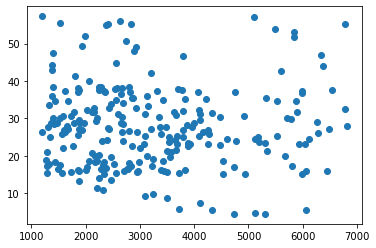

In [7]:
plt.scatter(prets['revenu'], prets['taux_endettement'])

Il existe de nombreuses options pour personnaliser un nuage de points. On peut modifier :

- la couleur des points, en utilisant l’argument color ou c ;
- la taille des points, via l’argument size ou s ;
- le type de marqueur via l’argument marker ;
- la transparence des points via l’argument alpha .

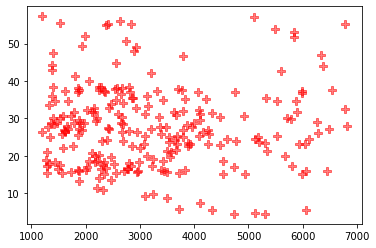

In [8]:
plt.scatter(prets['revenu'], prets['taux_endettement'], s=60, alpha=0.5, c='red', marker='P')

### diagramme circulaire : pie()
 Il y a deux arguments à préciser :labels , correspondant à la variable non numérique, celle sur laquelle ont été agrégées les données, et x, les valeurs agrégées correspondantes.

In [10]:
data = prets.groupby('ville')['remboursement'].sum()
data

ville
BORDEAUX     15330.59
LYON         26064.67
MARSEILLE    40895.72
NICE         23544.24
PARIS        94052.61
TOULOUSE     19286.18
Name: remboursement, dtype: float64

In [12]:
data = prets.groupby('ville')['remboursement'].sum()
data = data.reset_index()
data

,ville,remboursement
0,BORDEAUX,15330.59
1,LYON,26064.67
2,MARSEILLE,40895.72
3,NICE,23544.24
4,PARIS,94052.61
5,TOULOUSE,19286.18


([<matplotlib.patches.Wedge at 0xf85330fac0>,
 [Text(1.0735482898052735, 0.2397792098080497, 'BORDEAUX'),
  Text(0.7559779933342196, 0.7990602440331811, 'LYON'),
  Text(-0.22079479320563614, 1.0776129450286316, 'MARSEILLE'),
  Text(-0.9928563505107825, 0.4735359197045252, 'NICE'),
  Text(-0.3566773649937175, -1.0405677571889005, 'PARIS'),
  Text(1.0582353655336645, -0.30022976390396683, 'TOULOUSE')])

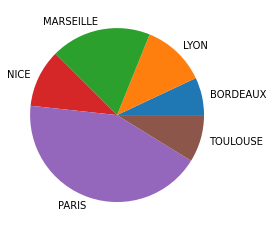

In [13]:
plt.pie(x=data['remboursement'], labels=data['ville'])

#### le pourcentage associé à chaque “part”. 
Pour cela, il faut spécifier un format numérique via l’argument autopct
 il permet d’afficher la part du chiffre d'affaires total réalisé par chaque agence, avec 2 chiffres après la virgule, et suivie du caractère% .

([<matplotlib.patches.Wedge at 0xf853379040>,
 [Text(1.0735482898052735, 0.2397792098080497, 'BORDEAUX'),
  Text(0.7559779933342196, 0.7990602440331811, 'LYON'),
  Text(-0.22079479320563614, 1.0776129450286316, 'MARSEILLE'),
  Text(-0.9928563505107825, 0.4735359197045252, 'NICE'),
  Text(-0.3566773649937175, -1.0405677571889005, 'PARIS'),
  Text(1.0582353655336645, -0.30022976390396683, 'TOULOUSE')],
 [Text(0.58557179443924, 0.1307886598952998, '6.99%'),
  Text(0.41235163272775605, 0.43585104219991694, '11.89%'),
  Text(-0.12043352356671061, 0.5877888791065262, '18.66%'),
  Text(-0.5415580093695176, 0.2582923198388319, '10.74%'),
  Text(-0.19455128999657315, -0.5675824130121274, '42.91%'),
  Text(0.5772192902910896, -0.1637616894021637, '8.80%')])

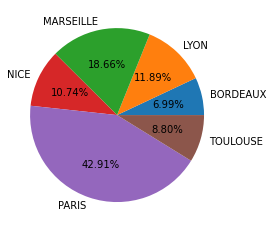

In [14]:
plt.pie(x=data['remboursement'], labels=data['ville'], autopct='%.2f%%')

### diagrammes en barres :bar() 
la fonction bar , qui est l’implémentation de Matplotlib des diagrammes à barres, il faut préciser deux arguments :

- x : les différentes valeurs de la variable non numérique, l’équivalent du labels de pie ;
- height : les valeurs agrégées, équivalent du x  de pie .

<BarContainer object of 6 artists>

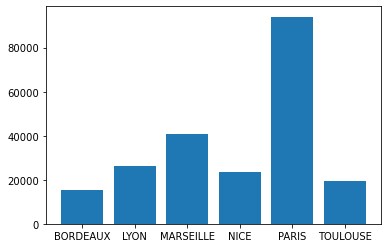

In [15]:
plt.bar(height=data['remboursement'], x=data['ville'])

ordonner du plus grand au plus petit : on peut tout de même trier le data frame en amont.

<BarContainer object of 6 artists>

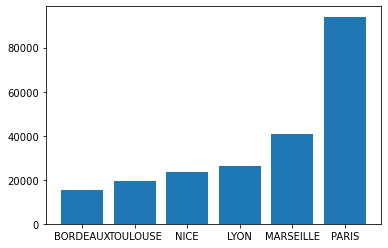

In [17]:
data_sorted = data.sort_values('remboursement', ascending=True)
plt.bar(height=data_sorted['remboursement'], x=data_sorted['ville'])

### histogrammes :hist()
histogramme est particulièrement utile lorsqu’on souhaite avoir une idée de la distribution d’une variable

(array([38., 42., 43., 27., 31., 17., 10., 11., 15., 10.]),
 array([1200. , 1760.7, 2321.4, 2882.1, 3442.8, 4003.5, 4564.2, 5124.9,
        5685.6, 6246.3, 6807. ]),
 <BarContainer object of 10 artists>)

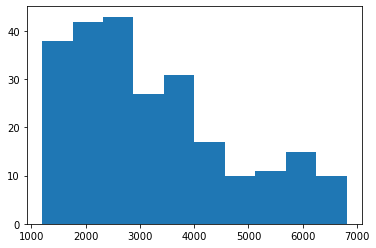

In [18]:
plt.hist(prets['revenu'])

### courbes
on utilise la fonction plot de Matplotlib. Celle-ci prend deux arguments en entrée : les informations à mettre en abscisse, et celles à mettre en ordonnée

Comme pour le nuage de points, il existe de très nombreuses options de personnalisation. Vous pouvez jouer sur la couleur de la ligne (  color  ou  c  ), son style (  linestyle  ou  ls  ), son épaisseur (  linewidth  ou  lw), si on souhaite ajouter un marqueur en plus de la ligne (  marker  ), etc.

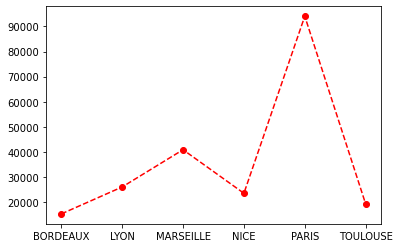

In [19]:
plt.plot(data['ville'], data['remboursement'], marker='o', linestyle='--', color='red')

## Créez plusieurs graphiques sur une même fenêtre


In [20]:
df1 = prets.loc[prets['ville'] == 'TOULOUSE', :]
df1.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.8,271212.0,131.99,Non
15,14,TOULOUSE,31400,2413.0,1334.39,300,immobilier,1.154,55.3,400317.0,192.49,Oui
31,30,TOULOUSE,31000,1785.0,514.08,240,immobilier,1.041,28.8,123379.2,53.52,Non
41,40,TOULOUSE,31400,3837.0,621.59,240,immobilier,1.205,16.2,149181.6,74.90,Non
50,49,TOULOUSE,31100,2931.0,1442.05,240,immobilier,1.200,49.2,346092.0,173.05,Oui


In [26]:
df1.shape[0]

27

In [24]:
df2 = prets.loc[prets['ville'] == 'PARIS', :]
df2.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
6,5,PARIS,75016,2476.0,836.89,240,immobilier,1.116,33.80,200853.6,93.40,Non
11,10,PARIS,75011,2293.0,378.34,240,immobilier,1.214,16.50,90801.6,45.93,Non
16,15,PARIS,75003,4109.0,1220.37,240,immobilier,1.272,29.70,292888.8,155.23,Non


In [25]:
df2.shape[0]

77

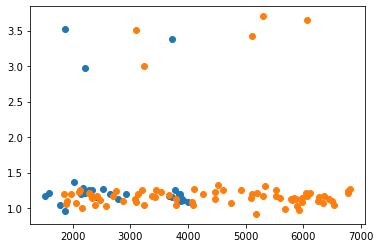

In [29]:
plt.scatter(df1['revenu'], df1['taux_interet'])
plt.scatter(df2['revenu'], df2['taux_interet'])
plt.show()

#### La legende
On attribut un label a chaque graphique

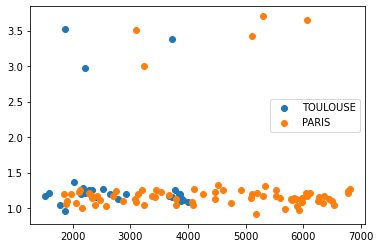

In [33]:
plt.scatter(df1['revenu'], df1['taux_interet'], label='TOULOUSE')
plt.scatter(df2['revenu'], df2['taux_interet'], label='PARIS')
plt.legend()
plt.show()

Pour tracer pour toutes les ville, on va faire une boucle for

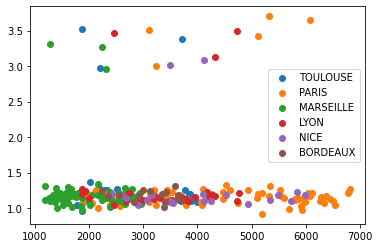

In [37]:
for ville in prets['ville'].unique():
    df = prets.loc[prets['ville'] == ville, :]
    plt.scatter(df['revenu'], df['taux_interet'], label=ville)
plt.legend()
plt.show()

In [17]:
prets_exo = pd.read_csv('prets_enrichi.csv')
prets_exo.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


In [39]:
dataf = prets_exo.groupby('type')['remboursement'].sum()
dataf = dataf.reset_index()
dataf

,type,remboursement
0,automobile,4386.60
1,immobilier,214787.41


([<matplotlib.patches.Wedge at 0xf858c5c460>,
 [Text(1.097826311179782, 0.06911866955745498, 'automobile'),
  Text(-1.0978263091574825, -0.06911870167805412, 'immobilier')],
 [Text(0.5988143515526083, 0.037701092485884526, '2.00%'),
  Text(-0.5988143504495359, -0.03770111000621133, '98.00%')])

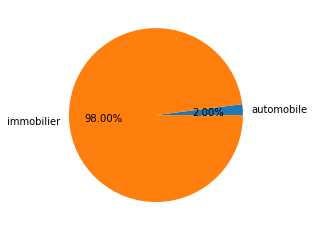

In [51]:
plt.pie(x=dataf['remboursement'], labels=dataf['type'], autopct = '%.2f%%')

In [41]:
df_immo = prets_exo.loc[prets_exo['type'] == 'immobilier', :]
df_immo

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.8,271212.0,131.99,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.5,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.5,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.8,105485.4,44.57,Non
5,4,MARSEILLE,13012,1476.0,423.61,240,immobilier,1.209,28.7,101666.4,51.21,Non
...,...,...,...,...,...,...,...,...,...,...,...,...
238,223,PARIS,75009,2127.0,672.13,240,immobilier,1.249,31.6,161311.2,83.95,Non
239,224,PARIS,75008,5118.0,1248.79,300,immobilier,1.206,24.4,374637.0,188.26,Non
241,225,BORDEAUX,33100,2356.0,876.43,180,immobilier,1.172,37.2,157757.4,77.04,Oui
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.140,57.1,698630.4,331.85,Oui


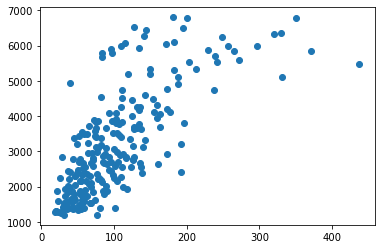

In [43]:
plt.scatter(df_immo['benefices'], df_immo['revenu'])

<BarContainer object of 228 artists>

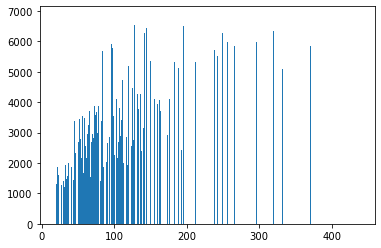

In [44]:
plt.bar(height=df_immo['revenu'], x=df_immo['benefices'])

In [50]:
df_ville = prets_exo.groupby('ville')['benefices'].sum()
df_ville = df_ville.reset_index()
df_ville

,ville,benefices
0,BORDEAUX,1681.32
1,LYON,3014.80
2,MARSEILLE,4395.91
3,NICE,2682.75
4,PARIS,10016.35
5,TOULOUSE,2138.07


<BarContainer object of 6 artists>

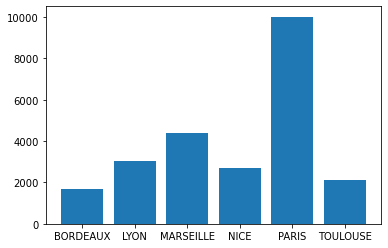

In [52]:
plt.bar(height= df_ville['benefices'], x=df_ville['ville'])

(array([63., 77., 57., 20., 12.,  7.,  2.,  4.,  1.,  1.]),
 array([  8.49 ,  51.404,  94.318, 137.232, 180.146, 223.06 , 265.974,
        308.888, 351.802, 394.716, 437.63 ]),
 <BarContainer object of 10 artists>)

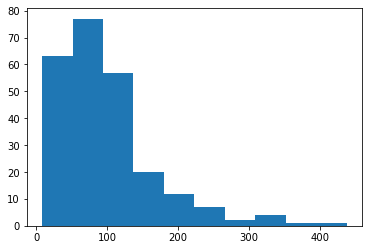

In [54]:
plt.hist(prets_exo['benefices'])

Text(0, 0.5, "Chiffre d'affaire (£)")

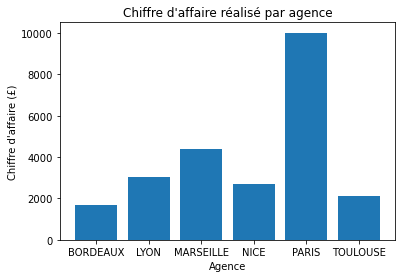

In [66]:
plt.bar(height= df_ville['benefices'], x=df_ville['ville'])
plt.title("Chiffre d'affaire réalisé par agence")
plt.xlabel('Agence')
plt.ylabel("Chiffre d'affaire (£)")

Text(0, 0.5, "Chiffre d'affaire (£)")

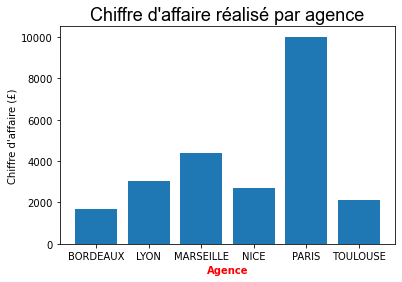

In [56]:
plt.bar(height= df_ville['benefices'], x=df_ville['ville'])
plt.title("Chiffre d'affaire réalisé par agence", fontname='Arial', fontsize=18)
plt.xlabel('Agence', color='red', fontweight='bold' )
plt.ylabel("Chiffre d'affaire (£)")

### Modifiez les éléments intérieurs
il y a de nombreux aspects internes au graphique sur lesquels on peut jouer. Vous en avez déjà entr'aperçu un, avec l’affichage textuel des valeurs sur les pie plots ou les barplots. Il est également possible de jouer – entre autres – sur les graduations (ou ticks, en anglais), le quadrillage, ou encore les couleurs de fond.

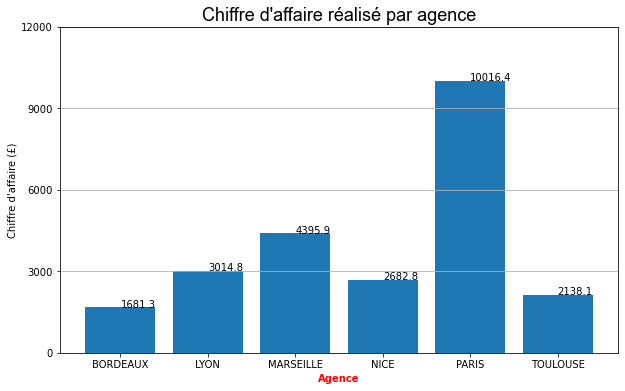

In [68]:
plt.figure(figsize=(10, 6))
plt.bar(height= df_ville['benefices'], x=df_ville['ville'])
plt.title("Chiffre d'affaire réalisé par agence", fontname='Arial', fontsize=18)
plt.xlabel('Agence', color='red', fontweight='bold' )
plt.ylabel("Chiffre d'affaire (£)")
plt.grid(axis='y')
plt.ylim(0, 12000)
plt.yticks([0, 3000, 6000, 9000, 12000])

ca = df_ville['benefices'].tolist()
for i in range(6):
    plt.text(i, ca[i], round(ca[i], 1))

plt.show()

on va centrer les chiffres sur les barres et les remonter légèrement des barres

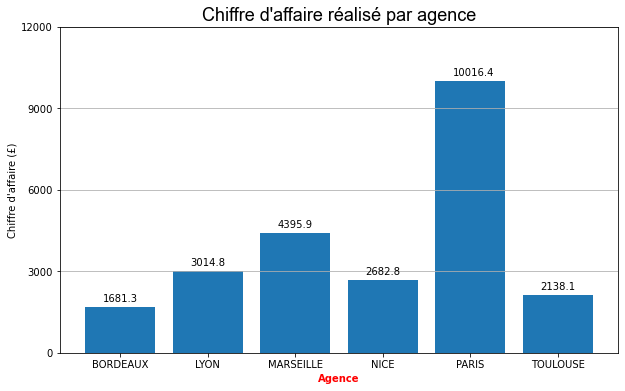

In [71]:
plt.figure(figsize=(10, 6))
plt.bar(height= df_ville['benefices'], x=df_ville['ville'])
plt.title("Chiffre d'affaire réalisé par agence", fontname='Arial', fontsize=18)
plt.xlabel('Agence', color='red', fontweight='bold' )
plt.ylabel("Chiffre d'affaire (£)")
plt.grid(axis='y')
plt.ylim(0, 12000)
plt.yticks([0, 3000, 6000, 9000, 12000])

ca = df_ville['benefices'].tolist()
for i in range(6):
    plt.text(i-0.2, ca[i]+200, round(ca[i], 1))

plt.show()

EXERCICES

In [72]:
CA = pd.read_csv('CA.csv')
CA.head()

,date,immobilier,automobile,consommation
0,2021-01-01,10439,5096,3808
1,2021-02-01,11266,5146,5838
2,2021-03-01,11315,5276,5601
3,2021-04-01,11456,5067,3639
4,2021-05-01,10816,4937,5273


In [74]:
CA['date'] = pd.to_datetime(CA['date'])
CA.head()

,date,immobilier,automobile,consommation
0,2021-01-01,10439,5096,3808
1,2021-02-01,11266,5146,5838
2,2021-03-01,11315,5276,5601
3,2021-04-01,11456,5067,3639
4,2021-05-01,10816,4937,5273


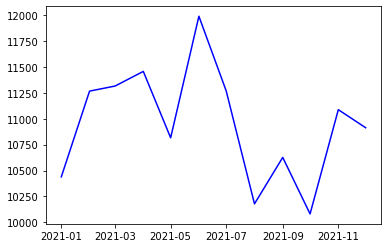

In [77]:
plt.plot(CA['date'], CA['immobilier'], color='blue' )


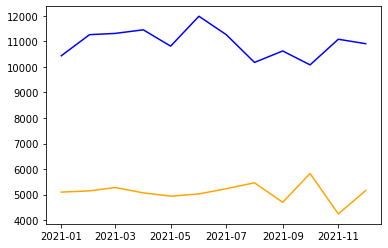

In [79]:
plt.plot(CA['date'], CA['immobilier'], color='blue' )
plt.plot(CA['date'], CA['automobile'], color='orange' )
plt.show()

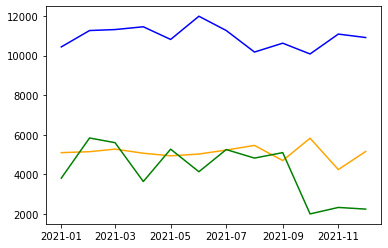

In [82]:
plt.plot(CA['date'], CA['immobilier'], color='blue', label='immobilier' )
plt.plot(CA['date'], CA['automobile'], color='orange', label='automobile' )
plt.plot(CA['date'], CA['consommation'], color='green', label='consommation' )
plt.show()

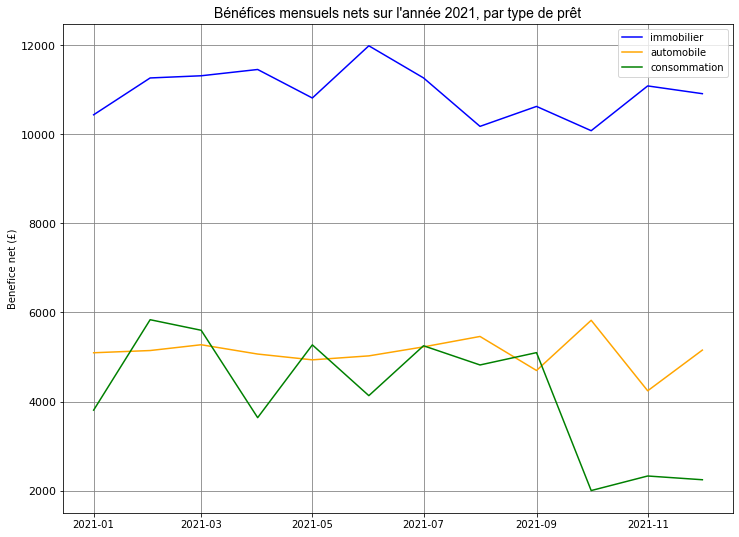

In [107]:
plt.figure(figsize=(12, 9))
plt.plot(CA['date'], CA['immobilier'], color='blue', label='immobilier' )
plt.plot(CA['date'], CA['automobile'], color='orange', label='automobile' )
plt.plot(CA['date'], CA['consommation'], color='green', label='consommation' )
plt.legend()
plt.title("Bénéfices mensuels nets sur l'année 2021, par type de prêt", fontname='Arial', fontsize=14)
plt.ylabel('Benefice net (£)')
plt.yticks(fontsize=11)
plt.grid(color='grey')

plt.show()

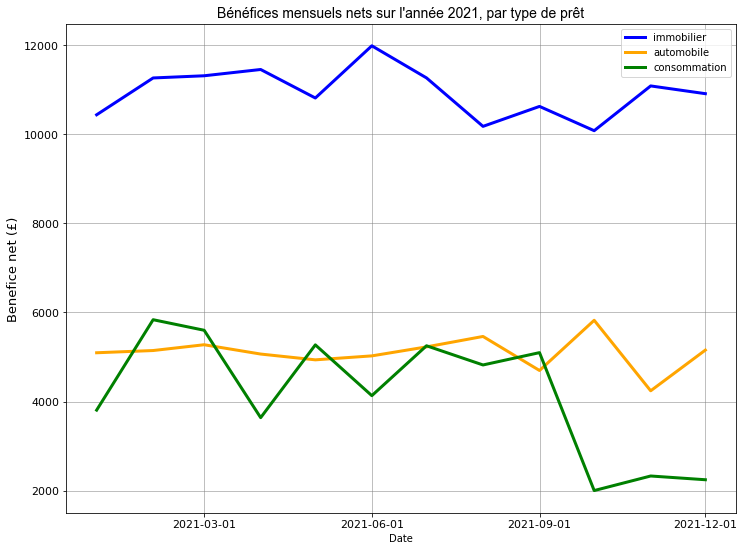

In [106]:
plt.figure(figsize=(12, 9))
plt.plot(CA['date'], CA['immobilier'], color='blue', label='immobilier', linewidth=3 )
plt.plot(CA['date'], CA['automobile'], color='orange', label='automobile', linewidth=3 )
plt.plot(CA['date'], CA['consommation'], color='green', label='consommation', linewidth=3 )
plt.legend(loc='upper right')
plt.title("Bénéfices mensuels nets sur l'année 2021, par type de prêt", fontname='Arial', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Benefice net (£)', fontsize=13)
plt.xticks(['2021-03','2021-06','2021-09', '2021-12'], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(color='grey', linestyle='-', linewidth=0.5)

plt.show()

In [5]:
type_agreg=prets.groupby('type').size().reset_index()
type_agreg

,type,0
0,automobile,16
1,immobilier,228


In [6]:
type_agreg=prets['type'].value_counts().reset_index()
type_agreg

,index,type
0,immobilier,228
1,automobile,16


In [7]:
type_agreg.columns=['type','nombre']
type_agreg

,type,nombre
0,immobilier,228
1,automobile,16


<BarContainer object of 2 artists>

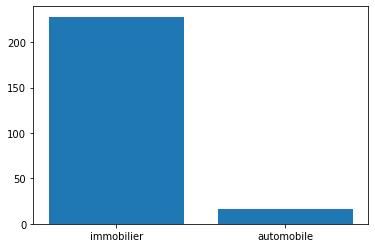

In [8]:
plt.bar(type_agreg['type'], type_agreg['nombre'])

([<matplotlib.patches.Wedge at 0x4cd253e310>,
 [Text(-1.0767412667284106, 0.22500720993803233, 'immobilier'),
  Text(1.0767412772617573, -0.22500715953213574, 'automobile')],
 [Text(-0.5873134182154967, 0.1227312054207449, '93.44%'),
  Text(0.5873134239609584, -0.12273117792661947, '6.56%')])

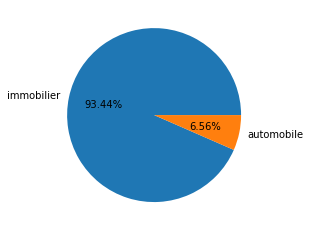

In [10]:
plt.pie(x=type_agreg['nombre'], labels=type_agreg['type'], autopct='%.2f%%')

In [20]:
prets_imo = prets_exo.loc[prets_exo['type'] == 'immobilier', :]
#plt.scatter(prets_imo['revenu'], prets_imo['benefices'])
prets_imo

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.8,271212.0,131.99,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.5,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.5,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.8,105485.4,44.57,Non
5,4,MARSEILLE,13012,1476.0,423.61,240,immobilier,1.209,28.7,101666.4,51.21,Non
...,...,...,...,...,...,...,...,...,...,...,...,...
238,223,PARIS,75009,2127.0,672.13,240,immobilier,1.249,31.6,161311.2,83.95,Non
239,224,PARIS,75008,5118.0,1248.79,300,immobilier,1.206,24.4,374637.0,188.26,Non
241,225,BORDEAUX,33100,2356.0,876.43,180,immobilier,1.172,37.2,157757.4,77.04,Oui
242,226,PARIS,75002,5098.0,2910.96,240,immobilier,1.140,57.1,698630.4,331.85,Oui


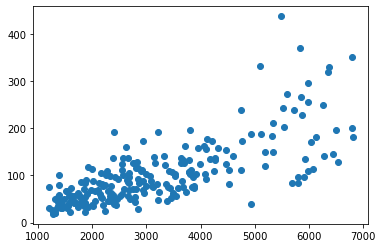

In [21]:
#prets_imo = prets_exo.loc[prets_exo['type'] == 'immobilier', :]
plt.scatter(prets_imo['revenu'], prets_imo['benefices'])

(array([63., 77., 57., 20., 12.,  7.,  2.,  4.,  1.,  1.]),
 array([  8.49 ,  51.404,  94.318, 137.232, 180.146, 223.06 , 265.974,
        308.888, 351.802, 394.716, 437.63 ]),
 <BarContainer object of 10 artists>)

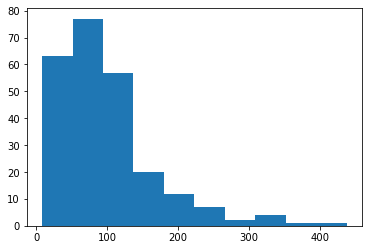

In [22]:
plt.hist(prets_exo['benefices'])

In [24]:
benef_ville = prets_exo.groupby('ville')['benefices'].sum().reset_index()
#plt.bar(benef_ville['ville'], benef_ville['benefices'])
benef_ville

,ville,benefices
0,BORDEAUX,1681.32
1,LYON,3014.80
2,MARSEILLE,4395.91
3,NICE,2682.75
4,PARIS,10016.35
5,TOULOUSE,2138.07


<BarContainer object of 6 artists>

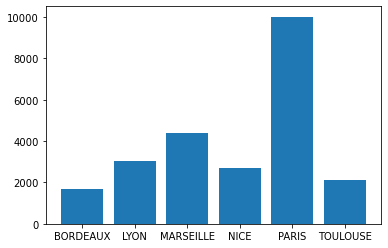

In [25]:
#benef_ville = prets_exo.groupby('ville')['benefices'].sum().reset_index()
plt.bar(benef_ville['ville'], benef_ville['benefices'])
